In [1]:
# June 13, 2019
# Tran Le Anh - MSc Student in Computer Vision
# Dept. of Electronics Engineering, Myongji University, South Korea
# tranleanh.nt@gmail.com
# https://sites.google.com/view/leanhtran

In [2]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Load the data
filename = 'traindata.dat'
data = pd.read_csv(filename, delimiter=';', header = None)
data = np.asarray(data)

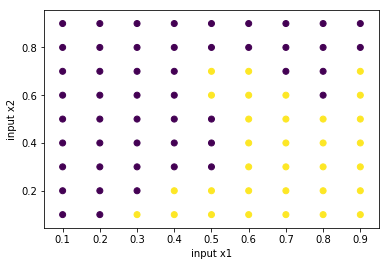

In [4]:
# Visualize the data
x1 = []
x2 = []
y = []

for i in range (len(data)):
    x1 = np.append(x1, data[i][0])
    x2 = np.append(x2, data[i][1])
    y = np.append(y, data[i][2])

plt.scatter(x1, x2, c = y)
plt.xlabel("input x1")
plt.ylabel("input x2")
plt.show()

In [5]:
# Construct the data
X = []
y = []

for i in range (len(data)):
    X.insert(len(X), [data[i][0], data[i][1]])
    y.insert(len(y), [data[i][2]])

X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [6]:
class Neural_Network(object):
    
    def __init__(self):
        # network architecture
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize1 = 5
        self.hiddenSize2 = 5

        # weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize1)   # weight matrix from input to hidden 1
        self.W2 = np.random.randn(self.hiddenSize1, self.hiddenSize2) # weight matrix from hidden 1 to hidden 2
        self.W3 = np.random.randn(self.hiddenSize2, self.outputSize)  # weight matrix from hidden 2 to output

    def forward(self, X):            # forward propagation
        self.z = np.dot(X, self.W1)          # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z)       # activation function
        self.z3 = np.dot(self.z2, self.W2)   # dot product of hidden layer (z2) and second set of 3x3 weights
        self.z4 = self.sigmoid(self.z3)      # activation function
        self.z5 = np.dot(self.z4, self.W3)   # dot product of hidden layer (z4) and second set of 3x1 weights
        o = self.sigmoid(self.z5)            # final activation function
        return o 

    def sigmoid(self, s):            # activation function 
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):       # derivative of sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):     # backward propgation
        self.o_error = y - o         # error
        self.o_delta = self.o_error*self.sigmoidPrime(o)

        self.z4_error = self.o_delta.dot(self.W3.T) 
        self.z4_delta = self.z4_error*self.sigmoidPrime(self.z4)
        
        self.z2_error = self.z4_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2)

        # updating weights
        self.W1 += X.T.dot(self.z2_delta)       
        self.W2 += self.z2.T.dot(self.z4_delta) 
        self.W3 += self.z4.T.dot(self.o_delta)  

    def train(self, X, y):           # training the model
        o = self.forward(X)
        self.backward(X, y, o)

In [7]:
# Training the network
training_error = []
epochs = 1000
NN = Neural_Network()

for i in range(epochs):              
    Loss = np.mean(np.square(y - NN.forward(X)))
    NN.train(X, y)
    training_error.append(Loss)
    print("Epoch " + str(i+1) + ": Loss = " + str(Loss))

Epoch 1: Loss = 0.27066717345033914
Epoch 2: Loss = 0.3597414158647465
Epoch 3: Loss = 0.22474086212053362
Epoch 4: Loss = 0.22648757579376114
Epoch 5: Loss = 0.1819295502359526
Epoch 6: Loss = 0.16163855790009382
Epoch 7: Loss = 0.19133785285424357
Epoch 8: Loss = 0.32380102411638756
Epoch 9: Loss = 0.1432200437139467
Epoch 10: Loss = 0.11894073581860559
Epoch 11: Loss = 0.11475340424089746
Epoch 12: Loss = 0.18158392806235407
Epoch 13: Loss = 0.2971486364385192
Epoch 14: Loss = 0.18648079698648673
Epoch 15: Loss = 0.12173346485938638
Epoch 16: Loss = 0.10415573999488623
Epoch 17: Loss = 0.09599258519782167
Epoch 18: Loss = 0.09324865052158815
Epoch 19: Loss = 0.09529936306623062
Epoch 20: Loss = 0.1081968641888051
Epoch 21: Loss = 0.1369835775087874
Epoch 22: Loss = 0.13952209628265333
Epoch 23: Loss = 0.14000899789750437
Epoch 24: Loss = 0.11769238707551244
Epoch 25: Loss = 0.11587510472986984
Epoch 26: Loss = 0.11085017228883134
Epoch 27: Loss = 0.10956202331115904
Epoch 28: Loss =

Epoch 549: Loss = 0.06990682711037353
Epoch 550: Loss = 0.0767129081069715
Epoch 551: Loss = 0.0698234904845379
Epoch 552: Loss = 0.07669971933788926
Epoch 553: Loss = 0.06973944136082458
Epoch 554: Loss = 0.07668664685243785
Epoch 555: Loss = 0.06965464263913522
Epoch 556: Loss = 0.07667368557360686
Epoch 557: Loss = 0.06956905771340356
Epoch 558: Loss = 0.07666082751565104
Epoch 559: Loss = 0.06948265070685625
Epoch 560: Loss = 0.07664806199567244
Epoch 561: Loss = 0.06939538669344429
Epoch 562: Loss = 0.07663537586385033
Epoch 563: Loss = 0.06930723190418192
Epoch 564: Loss = 0.0766227537472503
Epoch 565: Loss = 0.06921815391754632
Epoch 566: Loss = 0.07661017830211139
Epoch 567: Loss = 0.0691281218334669
Epoch 568: Loss = 0.07659763046951411
Epoch 569: Loss = 0.06903710643076814
Epoch 570: Loss = 0.07658508972945724
Epoch 571: Loss = 0.06894508030822406
Epoch 572: Loss = 0.07657253434859698
Epoch 573: Loss = 0.0688520180096165
Epoch 574: Loss = 0.07655994161715778
Epoch 575: Loss =

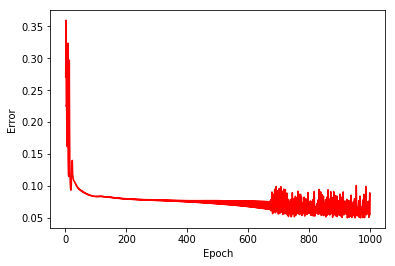

In [8]:
# Visualize Loss
epoch_count = range(1, epochs + 1)
plt.plot(epoch_count, training_error, 'r-')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [9]:
result = []
for i in range(len(X)):
    print("y = " + str(y[i][0]) + ", o = " + str(NN.forward(X[i])[0]))

y = 1.0, o = 0.8019876139834936
y = 0.0, o = 0.5462238138228995
y = 1.0, o = 0.9996867540863774
y = 1.0, o = 0.9983843213614447
y = 0.0, o = 0.7004466656721485
y = 1.0, o = 0.9988609930092496
y = 0.0, o = 0.3564439347297732
y = 0.0, o = 0.012255567605877263
y = 0.0, o = 0.3120999664884211
y = 1.0, o = 0.9918249899666736
y = 0.0, o = 0.0011263245986237634
y = 1.0, o = 0.9048800010945469
y = 0.0, o = 0.01792632384387354
y = 1.0, o = 0.9945647109363561
y = 0.0, o = 0.0011812205207124133
y = 0.0, o = 0.0011264942561037244
y = 0.0, o = 0.0026776287121250374
y = 0.0, o = 0.03572215914270252
y = 1.0, o = 0.9078082621052176
y = 0.0, o = 0.0011272236811304107
y = 0.0, o = 0.1636864867210111
y = 1.0, o = 0.9970781382109731
y = 0.0, o = 0.0018424887899321574
y = 0.0, o = 0.0011311702429140497
y = 0.0, o = 0.06900155493244897
y = 0.0, o = 0.002920372049973981
y = 0.0, o = 0.24960234146880178
y = 1.0, o = 0.9959889997152197
y = 0.0, o = 0.0011282255823028484
y = 1.0, o = 0.9997588439379161
y = 1.0,